# Импорт

In [149]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.preprocessing import PolynomialFeatures

from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score

from joblib import dump


# Загружаем датасет и разбиваем её на выборку.

In [150]:
models = pd.read_csv(
    '../Data/DataLaba1/energy_task_moded_removed_nan.csv').drop('year', axis=1)
a = -1
b = 1
power = 3
models = models.apply(lambda s: (s-s.mean())/s.std())
# models = models.apply(lambda s: a + (s - s.min())/(s.max() - s.min()) * (b-a))
sl = models.shape[0]
X_train, X_test, y_train, y_test = train_test_split(PolynomialFeatures(power).fit_transform(
    models.drop('Appliances', axis=1)[0:sl]), models['Appliances'][0:sl], test_size=0.25)


In [151]:
X_train.shape


(13903, 4495)

In [152]:
models.isna().sum()


Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
day            0
month          0
time           0
dtype: int64

In [153]:
models.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,day,month,time
count,1.853800e+04,1.853800e+04,1.853800e+04,1.853800e+04,1.853800e+04,1.853800e+04,1.853800e+04,1.853800e+04,1.853800e+04,1.853800e+04,...,1.853800e+04,1.853800e+04,1.853800e+04,1.853800e+04,1.853800e+04,1.853800e+04,1.853800e+04,1.853800e+04,1.853800e+04,1.853800e+04
mean,6.822559e-17,9.198957e-18,-6.623249e-16,-3.924888e-16,4.906110e-17,-5.212742e-16,-1.717139e-16,-1.306252e-15,-2.207750e-16,-7.972429e-16,...,-2.269076e-16,-7.359165e-17,9.592212e-15,-3.066319e-17,4.906110e-17,-1.594486e-16,7.359165e-17,1.410507e-16,9.812220e-17,-6.247625e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-8.552257e-01,-4.769330e-01,-3.044311e+00,-3.325080e+00,-1.933120e+00,-4.896368e+00,-2.522995e+00,-3.219450e+00,-2.815373e+00,-2.618318e+00,...,-2.983386e+00,-2.334398e+00,-3.536231e+00,-3.738138e+00,-1.651350e+00,-3.166214e+00,-2.456401e+00,-1.782042e+00,-1.572701e+00,-1.718169e+00
25%,-4.650748e-01,-4.769330e-01,-5.790515e-01,-7.337092e-01,-6.938293e-01,-6.254686e-01,-7.386177e-01,-7.175797e-01,-6.496646e-01,-8.112532e-01,...,-7.346820e-01,-7.051676e-01,-6.222345e-01,-6.419754e-01,-8.329617e-01,-7.899729e-01,-6.828676e-01,-8.349165e-01,-8.267315e-01,-8.764334e-01
50%,-3.675370e-01,-4.769330e-01,-5.743480e-02,-1.556148e-01,-1.583706e-01,2.171175e-02,-8.749393e-02,-2.161802e-01,-9.602498e-02,-1.428235e-01,...,-1.564439e-01,-9.444116e-02,7.928326e-02,2.634007e-01,-1.509713e-01,1.435506e-01,-8.058055e-02,-6.182012e-03,-8.076175e-02,1.340124e-02
75%,2.261394e-02,-4.769330e-01,5.829428e-01,7.056622e-01,5.242254e-01,6.991647e-01,5.205529e-01,7.773906e-01,6.041663e-01,7.176836e-01,...,6.691518e-01,5.595059e-01,7.313350e-01,7.999199e-01,5.992181e-01,1.435506e-01,6.669219e-01,8.225525e-01,6.652080e-01,8.551367e-01
max,9.483775e+00,8.363187e+00,2.836296e+00,5.807974e+00,4.327044e+00,3.832794e+00,3.459391e+00,3.362315e+00,2.607039e+00,2.782132e+00,...,2.837545e+00,3.509784e+00,2.264781e+00,1.358794e+00,4.077369e+00,2.350061e+00,2.792781e+00,1.769678e+00,1.411178e+00,1.720922e+00


# Создание модели

In [154]:
model_class = tf.keras.models.Sequential()
model_class.add(tf.keras.layers.Dense(40, 
                                      activation='sigmoid', 
                                      input_shape=(X_train.shape[1],), 
                                      name='input', 
                                      kernel_regularizer=tf.keras.regularizers.L2(l2=93), 
                                      kernel_constraint=tf.keras.constraints.max_norm(5.)))
model_class.add(tf.keras.layers.Dense(58, 
                                      activation='sigmoid', 
                                      name='hidden_layer_2', 
                                      bias_constraint=tf.keras.constraints.max_norm(5.),
                                      kernel_regularizer=tf.keras.regularizers.L2(l2=93)))
model_class.add(tf.keras.layers.Dense(30, 
                                      activation='sigmoid', 
                                      name='hidden_layer_3', 
                                      bias_constraint=tf.keras.constraints.max_norm(5.),
                                      kernel_regularizer=tf.keras.regularizers.L2(l2=93)))
model_class.add(tf.keras.layers.Dense(20, 
                                      name='output', 
                                      bias_constraint=tf.keras.constraints.max_norm(5.), 
                                      kernel_regularizer=tf.keras.regularizers.L2(l2=93)))
model_class.summary()


Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (Dense)               (None, 40)                179840    
                                                                 
 hidden_layer_2 (Dense)      (None, 58)                2378      
                                                                 
 hidden_layer_3 (Dense)      (None, 30)                1770      
                                                                 
 output (Dense)              (None, 20)                620       
                                                                 
Total params: 184,608
Trainable params: 184,608
Non-trainable params: 0
_________________________________________________________________


In [155]:
model_coder = tf.keras.models.Sequential([
    tf.keras.layers.Dense(58, input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(1,)
])


## Компиляция

In [156]:
model_coder.compile(
    optimizer='Adam',
    loss='mse',
    metrics=['mse']
)


# Обучение

In [157]:
model_coder.fit(
    X_train,
    y_train,
    validation_split=0.7,
    epochs=70,
    batch_size=5000
)


Epoch 1/70
1/1 [==============================] - 1s 1s/step - loss: 14.3150 - mse: 14.3150 - val_loss: 423.7563 - val_mse: 423.7563
Epoch 2/70
1/1 [==============================] - 0s 136ms/step - loss: 456.2002 - mse: 456.2002 - val_loss: 25.1128 - val_mse: 25.1128
Epoch 3/70
1/1 [==============================] - 0s 135ms/step - loss: 25.8272 - mse: 25.8272 - val_loss: 126.7372 - val_mse: 126.7372
Epoch 4/70
1/1 [==============================] - 0s 124ms/step - loss: 139.9648 - mse: 139.9648 - val_loss: 240.0281 - val_mse: 240.0281
Epoch 5/70
1/1 [==============================] - 0s 131ms/step - loss: 262.7480 - mse: 262.7480 - val_loss: 134.0281 - val_mse: 134.0281
Epoch 6/70
1/1 [==============================] - 0s 120ms/step - loss: 145.6990 - mse: 145.6990 - val_loss: 18.5030 - val_mse: 18.5030
Epoch 7/70
1/1 [==============================] - 0s 123ms/step - loss: 19.4882 - mse: 19.4882 - val_loss: 24.8351 - val_mse: 24.8351
Epoch 8/70
1/1 [==============================] -

# Predict

In [158]:
y_predicted = model_coder.predict(X_test).T[0]


145/145 [==============================] - 0s 1ms/step


# Оценка качества 

In [159]:
y_all = model_coder.predict(PolynomialFeatures(power).fit_transform(models.drop('Appliances', axis=1)[0:sl])).T[0]


580/580 [==============================] - 1s 1ms/step


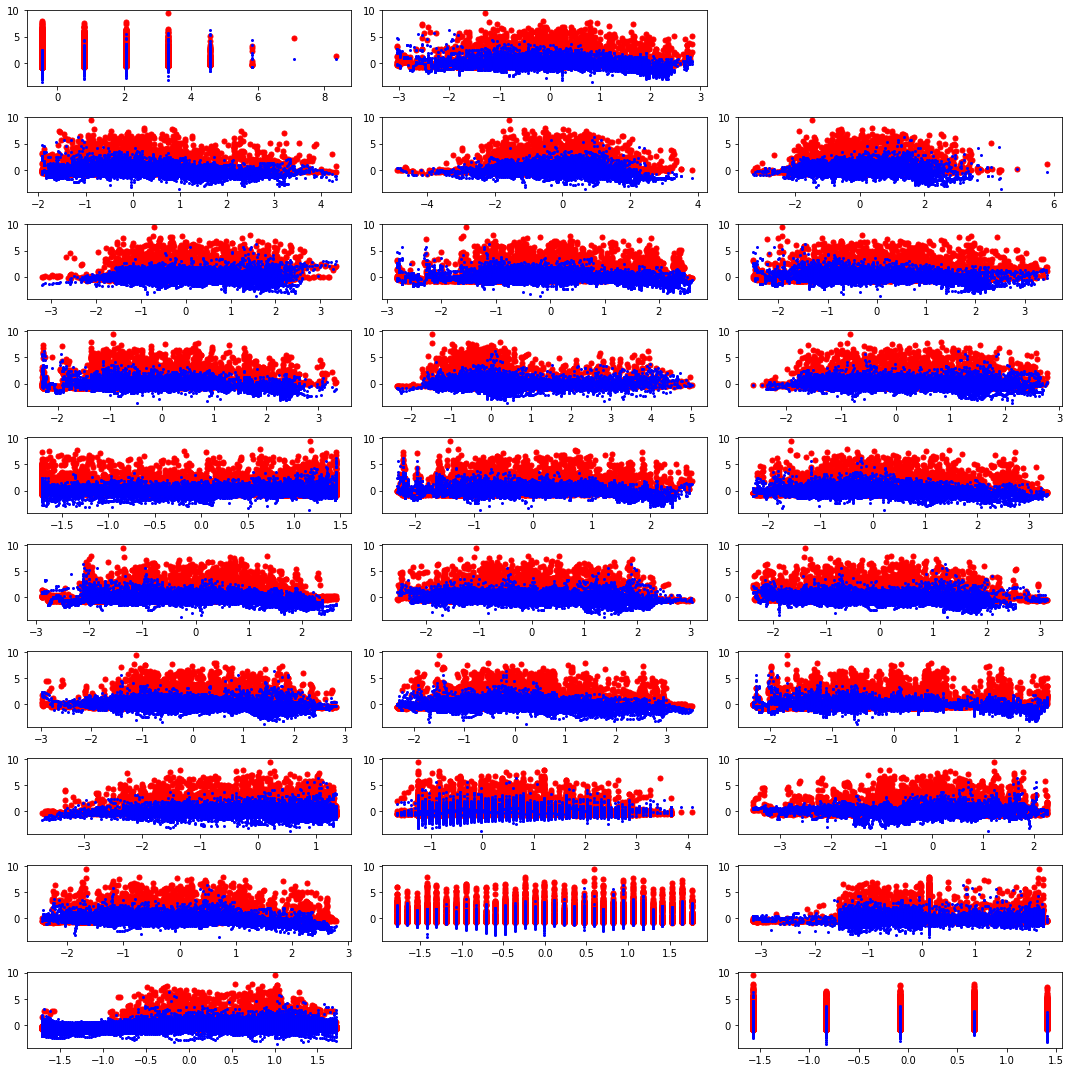

In [160]:
import matplotlib.gridspec as gridspec

fig = plt.figure(tight_layout=True)
fig.set_figheight(15)
fig.set_figwidth(15)
c = models.drop('Appliances', axis=1).columns
xl = c.shape[0] // 3 + (c.shape[0] % 3 > 0)
yl = 3
gs = gridspec.GridSpec(xl, yl)
z=0
k=0
for i in c:
  z = z % xl
  k = k % yl
  ax = fig.add_subplot(gs[int(z), int(k)])
  ax.plot(models[i], models['Appliances'], 'ro', markersize=5)
  ax.plot(models[i], y_all, 'bo', markersize=2)
  k+=1
  z+=(k % 3) // 2
  

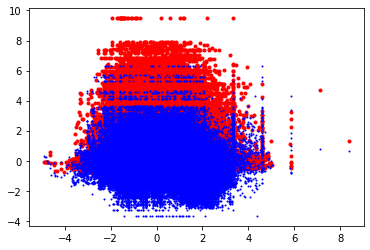

In [161]:
plt.plot(models.drop('Appliances', axis=1)[0:sl],
         models['Appliances'][0:sl], 'ro', markersize=3)
plt.plot(models.drop('Appliances', axis=1)[0:sl], y_all, 'bo', markersize=1)


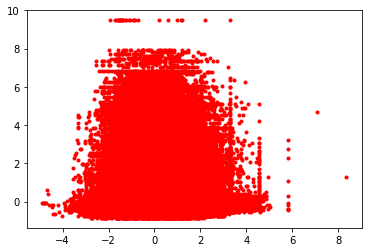

In [162]:
plt.plot(models.drop('Appliances', axis=1)[0:sl],
         models['Appliances'][0:sl], 'ro', markersize=3)


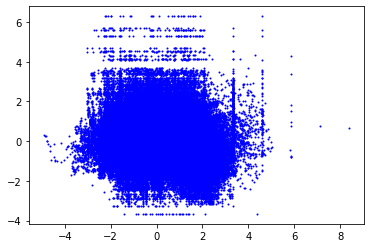

In [163]:
plt.plot(models.drop('Appliances', axis=1)[0:sl], y_all, 'bo', markersize=1)


In [164]:
print(f"MAE: {mean_absolute_error(y_predicted, y_test)}",
      f'RMSE: {mean_squared_error(y_predicted, y_test)}',
      f'MSE: {mean_squared_error(y_predicted, y_test)**0.5}',
      f'MAPE: {mean_absolute_percentage_error(y_predicted, y_test)}',
      f'R^2: {r2_score(y_predicted, y_test)}',
      sep='\n')

MAE: 0.6807730377667791
RMSE: 1.1490635716685011
MSE: 1.0719438285976095
MAPE: 6.2239536790330146
R^2: -1.0753975312058115
